## Report for the LJMD Project

This report outlines the approach taken to benchmark the LJMD code and presents the corresponding findings. The benchmarking process involved three distinct tasks: (1) refactoring and optimizing for single-core performance, which was assigned to Neeraj Kulhari; (2) MPI parallelization, which was assigned to Iara Ota; and (3) OMP parallelization, which was assigned to Andrea S.

### Optimization of the Serial Code

> The initial step in our performance optimization process involved the utilization of compiler optimization flags. 

> Specifically, we increased the optimization level from -O2 to -O3 and included the flags -fomit-frame-pointer and -msse3.

> Subsequently, we explored additional optimization techniques, such as substituting computationally expensive mathematical operations with faster alternatives (e.g., minimizing the number of calls to the sqrt function and division operations).

> Additionally, we aimed to improve the data structure to enhance memory access and prevent memory aliasing. Loop unrolling was employed in the azzero function, and we introduced prefactors in the ekin, verlet, and force functions to eliminate repetitive operations. 

> In the final stage of optimization, we leveraged our physical understanding of the system to further refine the force calculation process. Specifically, we applied Newton's third law to optimize the calculation of the pairwise interaction force between particles. This involved updating the force calculation such that each force calculation between two particles is only computed once, which significantly reduced the total number of calculations and subsequently improved runtime.

> Finally, we present the runtime results for the Argon_108 and Argon_2916 simulations at each stage of optimization, indicating that the overall runtime reduced significantly as we implemented each optimization technique. Our findings suggest that implementing a combination of these optimization techniques can significantly improve the performance of LJMD code.

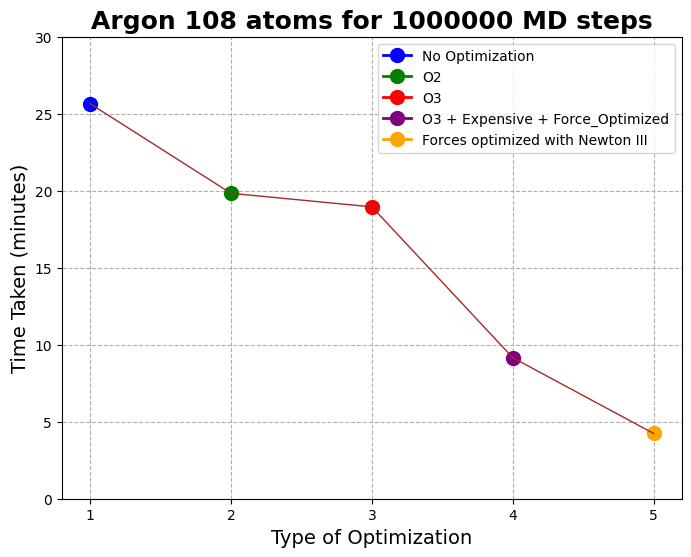

In [7]:
import matplotlib.pyplot as plt

# Define the x and y values for the line chart
x_values = [1, 2, 3, 4, 5]
y_values = [1539.080, 1189.907, 1137.080 , 549.369, 254.153]  # Replace with actual time measurements it is in seconds
# convert to minutes
y_values = [x / 60 for x in y_values]

# Define the colors for each value of the x-axis
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line chart with different colors for each value of the x-axis
for i in range(len(x_values)):
    ax.plot(x_values[i], y_values[i], marker='o', color=colors[i], linewidth=2, markersize=10)

#Join the dots with a line
ax.plot(x_values, y_values, color='brown', linewidth=1)

# Set the x-axis and y-axis labels and limits
ax.set_xlabel('Type of Optimization', fontsize=14)
ax.set_ylabel('Time Taken (minutes)', fontsize=14)
ax.set_ylim(bottom=0, top=30)

# Set the x-axis tick labels and font size
ax.set_xticks(x_values)
#ax.set_xticklabels(['Original', 'O2', 'O3', 'O3 + Math/Forces', 'Forces optimized with Newton'], fontsize=12)

# Set the chart title and font size
ax.set_title('Argon 108 atoms for 1000000 MD steps', fontsize=18, fontweight='bold')

# Add grid lines
ax.grid(True, linestyle='--')

# Add a legend
ax.legend(['No Optimization', 'O2', 'O3', 'O3 + Expensive + Force_Optimized', 'Forces optimized with Newton III '], loc='best', fontsize=10)

# Show the chart
plt.show()

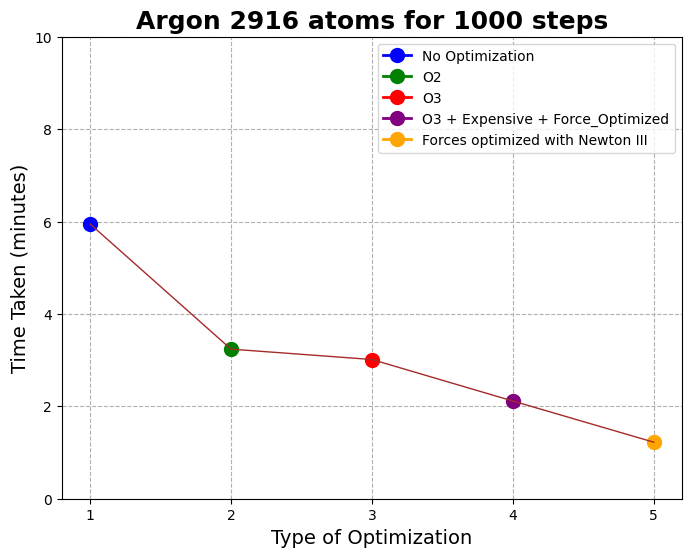

In [8]:
import matplotlib.pyplot as plt

# Define the x and y values for the line chart
x_values = [1, 2, 3, 4, 5]
y_values = [356.85 , 194.28, 180.80, 126.90 , 73.456]  # Replace with actual time measurements it is in seconds
# convert to minutes
y_values = [x / 60 for x in y_values]

# Define the colors for each value of the x-axis
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line chart with different colors for each value of the x-axis
for i in range(len(x_values)):
    ax.plot(x_values[i], y_values[i], marker='o', color=colors[i], linewidth=2, markersize=10)

#Join the dots with a line
ax.plot(x_values, y_values, color='brown', linewidth=1)

# Set the x-axis and y-axis labels and limits
ax.set_xlabel('Type of Optimization', fontsize=14)
ax.set_ylabel('Time Taken (minutes)', fontsize=14)
ax.set_ylim(bottom=0, top=10)

# Set the x-axis tick labels and font size
ax.set_xticks(x_values)
#ax.set_xticklabels(['Original', 'O2', 'O3', 'O3 + Math/Forces', 'Forces optimized with Newton'], fontsize=12)

# Set the chart title and font size
ax.set_title('Argon 2916 atoms for 1000 steps', fontsize=18, fontweight='bold')

# Add grid lines
ax.grid(True, linestyle='--')

# Add a legend
ax.legend(['No Optimization', 'O2', 'O3', 'O3 + Expensive + Force_Optimized', 'Forces optimized with Newton III '], loc='best', fontsize=10)

# Show the chart
plt.show()

The plot shows the time taken for different optimization types to complete a simulation of Argon 108 atoms using **1,000,000 steps**. The time taken for the Newtons Optimized forces was less than a minute for 10,000 steps.

However, if we were to measure the time taken in seconds for fewer steps, the difference in time taken between the optimization types would be very small. This is because the simulation time taken is proportional to the number of steps taken, and the number of steps taken in this case is very large.

Measuring the time taken in seconds could introduce errors due to the limitations of the timing function used and the variation in the computer's processing power. Hence, measuring the time taken in minutes provides a more accurate representation of the time taken for the simulations.


Our optimization efforts have primarily focused on enhancing the force and Verlet functions since these two functions serve as the heart of the LJMD code. Specifically, the force function calculates the forces that particles exert on each other, and the Verlet function integrates the equations of motion to update the positions and velocities of the particles. As such, optimizing these two functions can have a significant impact on the overall performance of the code.

Our approach of focusing on the core functions of the code proved to be effective in significantly reducing the overall runtime, as demonstrated by our benchmarking results.

### Parallelization-MPI